In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import folium


In [4]:
df = pd.read_csv('data/subnationalforestcover.csv')

print(df.head())

  country         subnational1     subnational2  threshold  area_ha  \
0   India  Andaman and Nicobar  Nicobar Islands          0   172679   
1   India  Andaman and Nicobar  Nicobar Islands         10   172679   
2   India  Andaman and Nicobar  Nicobar Islands         15   172679   
3   India  Andaman and Nicobar  Nicobar Islands         20   172679   
4   India  Andaman and Nicobar  Nicobar Islands         25   172679   

   extent_2000_ha  extent_2010_ha  gain_2000-2020_ha  tc_loss_ha_2001  \
0          172679          172679                205             1240   
1          150112          146804                205             1237   
2          149461          146205                205             1236   
3          149054          145955                205             1236   
4          148547          145598                205             1236   

   tc_loss_ha_2002  ...  tc_loss_ha_2014  tc_loss_ha_2015  tc_loss_ha_2016  \
0             1502  ...              111                

In [7]:
cols_of_interest = ['country', 'subnational1', 'subnational2', 'threshold', 'area_ha', 'gain_2000-2020_ha'] + [col for col in df.columns if 'tc_loss_ha_' in col]

df_filtered = df[cols_of_interest]

df_melted = pd.melt(df_filtered, id_vars=['country', 'subnational1', 'subnational2', 'threshold', 'area_ha', 'gain_2000-2020_ha'], 
                    var_name='year', value_name='forest_loss_ha')

df_melted['year'] = df_melted['year'].str.extract('(\d{4})').astype(int)

print(df_melted.head())


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/var/folders/8q/0k5tmyts113cdy0qkww2_w580000gn/T/ipykernel_6532/3768133224.py:8: SyntaxWarning: invalid escape sequence '\d'
  df_melted['year'] = df_melted['year'].str.extract('(\d{4})').astype(int)


  country         subnational1     subnational2  threshold  area_ha  \
0   India  Andaman and Nicobar  Nicobar Islands          0   172679   
1   India  Andaman and Nicobar  Nicobar Islands         10   172679   
2   India  Andaman and Nicobar  Nicobar Islands         15   172679   
3   India  Andaman and Nicobar  Nicobar Islands         20   172679   
4   India  Andaman and Nicobar  Nicobar Islands         25   172679   

   gain_2000-2020_ha  year  forest_loss_ha  
0                205  2001            1240  
1                205  2001            1237  
2                205  2001            1236  
3                205  2001            1236  
4                205  2001            1236  


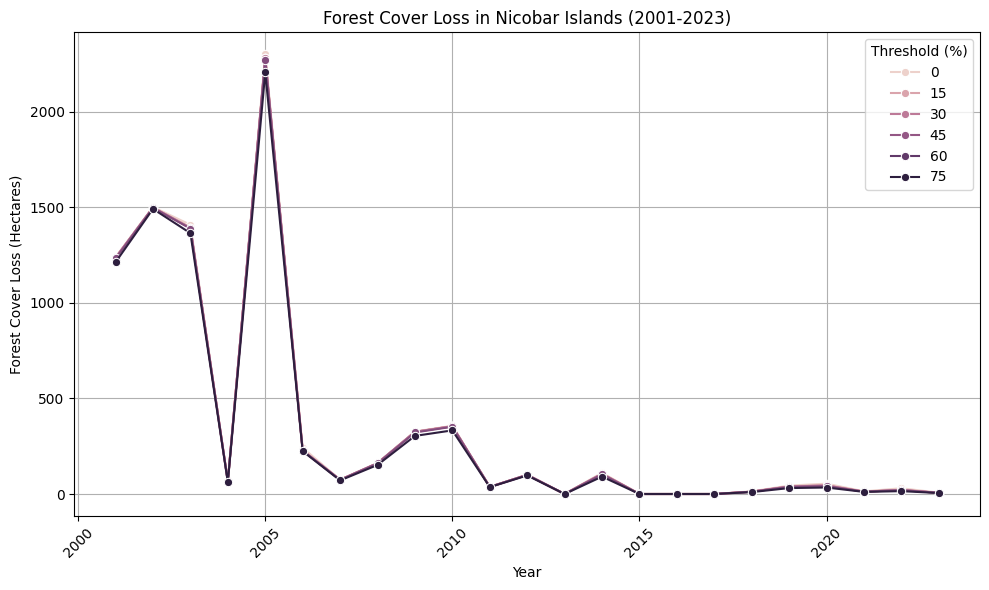

In [8]:
# Filter data for Nicobar Islands
nicobar_data = df_melted[(df_melted['subnational2'] == 'Nicobar Islands')]

# Plot the forest cover loss over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=nicobar_data, x='year', y='forest_loss_ha', hue='threshold', marker='o')

plt.title('Forest Cover Loss in Nicobar Islands (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Forest Cover Loss (Hectares)')
plt.legend(title='Threshold (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/8q/0k5tmyts113cdy0qkww2_w580000gn/T/ipykernel_6532/1878126825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nicobar_data['cumulative_loss_ha'] = nicobar_data.groupby(['threshold'])['forest_loss_ha'].cumsum()


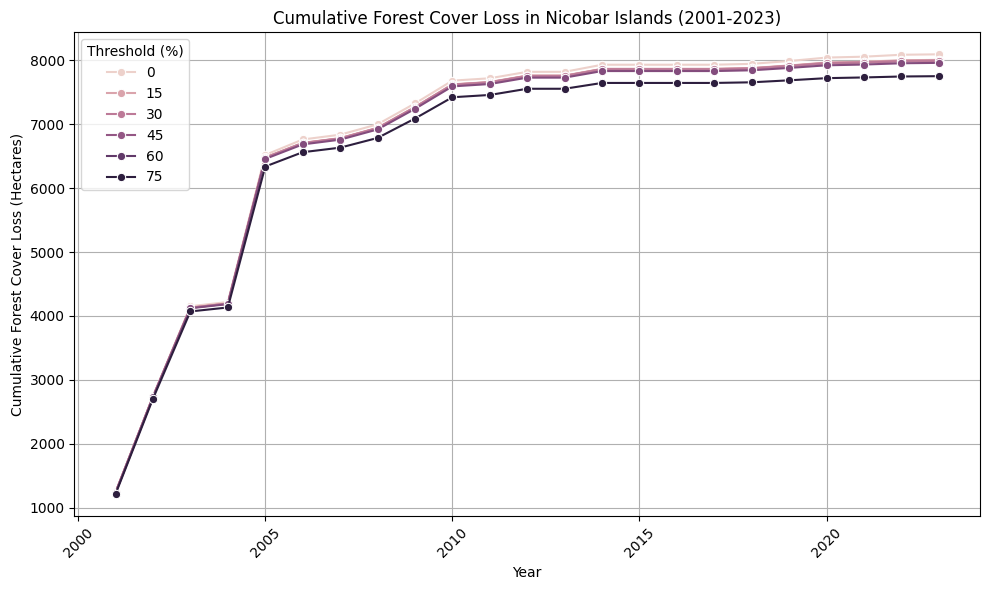

In [9]:
# Calculate cumulative forest loss by year and threshold
nicobar_data['cumulative_loss_ha'] = nicobar_data.groupby(['threshold'])['forest_loss_ha'].cumsum()

# Plot cumulative forest loss over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=nicobar_data, x='year', y='cumulative_loss_ha', hue='threshold', marker='o')

plt.title('Cumulative Forest Cover Loss in Nicobar Islands (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Cumulative Forest Cover Loss (Hectares)')
plt.legend(title='Threshold (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
from folium.plugins import MarkerCluster

# Initialize the map centered on Nicobar Islands
map_nicobar = folium.Map(location=[7.5586, 93.9093], zoom_start=7)

# Initialize the marker cluster
marker_cluster = MarkerCluster().add_to(map_nicobar)

# Add markers to the cluster (assuming each row is an event or region)
for _, row in nicobar_data.iterrows():
    folium.Marker(
        location=[nicobar_lat, nicobar_lon],
        popup=f"Year: {row['year']}<br>Forest Loss: {row['forest_loss_ha']} ha"
    ).add_to(marker_cluster)

# Save the map
map_nicobar.save('nicobar_forest_loss_cluster_map.html')
map_nicobar


In [26]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/subnationalforestcover.csv')

# Inspect the dataset
print(data.head())

# Handle any missing values if necessary (this is just an example)
data.fillna(0, inplace=True)


  country         subnational1     subnational2  threshold  area_ha  \
0   India  Andaman and Nicobar  Nicobar Islands          0   172679   
1   India  Andaman and Nicobar  Nicobar Islands         10   172679   
2   India  Andaman and Nicobar  Nicobar Islands         15   172679   
3   India  Andaman and Nicobar  Nicobar Islands         20   172679   
4   India  Andaman and Nicobar  Nicobar Islands         25   172679   

   extent_2000_ha  extent_2010_ha  gain_2000-2020_ha  tc_loss_ha_2001  \
0          172679          172679                205             1240   
1          150112          146804                205             1237   
2          149461          146205                205             1236   
3          149054          145955                205             1236   
4          148547          145598                205             1236   

   tc_loss_ha_2002  ...  tc_loss_ha_2014  tc_loss_ha_2015  tc_loss_ha_2016  \
0             1502  ...              111                

In [28]:
# Create a new DataFrame to hold the yearly data
years = [str(year) for year in range(2001, 2024)]  # Years you have data for
features = []

# Iterate through each region and prepare the feature set
for region in data['subnational2'].unique():
    region_data = data[data['subnational2'] == region]
    if region_data.shape[0] >= len(years):  # Ensure we have enough data
        for i in range(len(years)):
            year_data = region_data.iloc[i]
            # Append features: previous year's loss, area, etc.
            features.append([
                region,
                int(years[i]),
                year_data['tc_loss_ha_2020'],  # Target variable (change as needed)
                *[year_data[f'tc_loss_ha_{year}'] for year in years]  # Previous years' loss as features
            ])

# Create a DataFrame with features
features_df = pd.DataFrame(features, columns=['region', 'year', 'target_loss'] + years)

# Convert years into a usable format
features_df = features_df.set_index(['region', 'year'])


In [31]:
# After creating features_df
print("Features DataFrame:")
print(features_df.head())
print("Shape of features_df:", features_df.shape)

# Ensure there are no empty or NaN values
features_df.dropna(inplace=True)  # Drop rows with any NaN values

# Prepare the data for training
X = features_df.drop(columns=['target_loss']).values  # All features except the target
y = features_df['target_loss'].values  # The target variable

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Check if either X or y is empty
if X.shape[0] == 0 or y.shape[0] == 0:
    print("Error: Either X or y is empty. Check the feature extraction steps.")
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')


Features DataFrame:
Empty DataFrame
Columns: [target_loss, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Index: []

[0 rows x 24 columns]
Shape of features_df: (0, 24)
Shape of X: (0, 23)
Shape of y: (0,)
Error: Either X or y is empty. Check the feature extraction steps.


In [32]:
print("Features DataFrame:")
print(features_df.head())
print("Shape of features_df:", features_df.shape)
print("Columns in features_df:", features_df.columns)


Features DataFrame:
Empty DataFrame
Columns: [target_loss, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Index: []

[0 rows x 24 columns]
Shape of features_df: (0, 24)
Columns in features_df: Index(['target_loss', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')


In [36]:
print("Original Data:")
print(data.head())
print("Shape of Original Data:", data.shape)



Original Data:
  country         subnational1     subnational2  threshold  area_ha  \
0   India  Andaman and Nicobar  Nicobar Islands          0   172679   
1   India  Andaman and Nicobar  Nicobar Islands         10   172679   
2   India  Andaman and Nicobar  Nicobar Islands         15   172679   
3   India  Andaman and Nicobar  Nicobar Islands         20   172679   
4   India  Andaman and Nicobar  Nicobar Islands         25   172679   

   extent_2000_ha  extent_2010_ha  gain_2000-2020_ha  tc_loss_ha_2001  \
0          172679          172679                205             1240   
1          150112          146804                205             1237   
2          149461          146205                205             1236   
3          149054          145955                205             1236   
4          148547          145598                205             1236   

   tc_loss_ha_2002  ...  tc_loss_ha_2014  tc_loss_ha_2015  tc_loss_ha_2016  \
0             1502  ...              111 

In [37]:
import pandas as pd

# Assuming 'data' is your original DataFrame that has been loaded
# Print the original DataFrame to check its structure
print("Original Data:")
print(data.head())

# Create a list to hold features
features = []

# Loop through unique regions in your dataset
for region in data['subnational2'].unique():
    region_data = data[data['subnational2'] == region]
    
    # Ensure we have data for at least the years we want to include
    if region_data.shape[0] >= 23:  # Assuming you want to include 2001-2023
        for i in range(len(years)):
            year_data = region_data.iloc[i]
            features.append([
                region,  # Region name
                year_data['tc_loss_ha_2020'],  # Target variable for 2020
                *[year_data[f'tc_loss_ha_{year}'] for year in years]  # Features for previous years
            ])

# Create DataFrame from the features list
features_df = pd.DataFrame(features, columns=['region', 'target_loss'] + years)

# Check the constructed features DataFrame
print("Constructed Features DataFrame:")
print(features_df.head())
print("Shape of features_df:", features_df.shape)


Original Data:
  country         subnational1     subnational2  threshold  area_ha  \
0   India  Andaman and Nicobar  Nicobar Islands          0   172679   
1   India  Andaman and Nicobar  Nicobar Islands         10   172679   
2   India  Andaman and Nicobar  Nicobar Islands         15   172679   
3   India  Andaman and Nicobar  Nicobar Islands         20   172679   
4   India  Andaman and Nicobar  Nicobar Islands         25   172679   

   extent_2000_ha  extent_2010_ha  gain_2000-2020_ha  tc_loss_ha_2001  \
0          172679          172679                205             1240   
1          150112          146804                205             1237   
2          149461          146205                205             1236   
3          149054          145955                205             1236   
4          148547          145598                205             1236   

   tc_loss_ha_2002  ...  tc_loss_ha_2014  tc_loss_ha_2015  tc_loss_ha_2016  \
0             1502  ...              111 

In [38]:
import pandas as pd

# Assuming 'data' is your original DataFrame loaded from the CSV
print("Original Data:")
print(data.head())

# Prepare to collect features
features = []

# Loop through each unique region
for region in data['subnational2'].unique():
    region_data = data[data['subnational2'] == region]
    
    # Check if we have enough data for the years we want to include
    if region_data.shape[0] > 0:  # Ensure there's data for the region
        # Collect feature sets based on years
        for index, row in region_data.iterrows():
            year_features = [row[f'tc_loss_ha_{year}'] for year in range(2001, 2024)]
            features.append([region, row['tc_loss_ha_2020']] + year_features)  # target variable for 2020

# Create features DataFrame
features_df = pd.DataFrame(features, columns=['region', 'target_loss'] + [f'tc_loss_ha_{year}' for year in range(2001, 2024)])

# Check the constructed features DataFrame
print("Constructed Features DataFrame:")
print(features_df.head())
print("Shape of features_df:", features_df.shape)


Original Data:
  country         subnational1     subnational2  threshold  area_ha  \
0   India  Andaman and Nicobar  Nicobar Islands          0   172679   
1   India  Andaman and Nicobar  Nicobar Islands         10   172679   
2   India  Andaman and Nicobar  Nicobar Islands         15   172679   
3   India  Andaman and Nicobar  Nicobar Islands         20   172679   
4   India  Andaman and Nicobar  Nicobar Islands         25   172679   

   extent_2000_ha  extent_2010_ha  gain_2000-2020_ha  tc_loss_ha_2001  \
0          172679          172679                205             1240   
1          150112          146804                205             1237   
2          149461          146205                205             1236   
3          149054          145955                205             1236   
4          148547          145598                205             1236   

   tc_loss_ha_2002  ...  tc_loss_ha_2014  tc_loss_ha_2015  tc_loss_ha_2016  \
0             1502  ...              111 

In [39]:
# Separate the features and the target variable
X = features_df.drop(columns=['region', 'target_loss'])
y = features_df['target_loss']

# Check for NaN values in X and y
print("Check for NaN values in X:", X.isnull().sum().sum())
print("Check for NaN values in y:", y.isnull().sum())


Check for NaN values in X: 0
Check for NaN values in y: 0


In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")



Training data shape: (4262, 23), Test data shape: (1066, 23)


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}")


MAE: 1.1978048780487793, RMSE: 8.029447549798913, R²: 0.9998665978147512


In [45]:
# Extract the last known values from the features DataFrame
last_known_values = features_df.iloc[-1]  # Get the last row of the DataFrame

# Create the future_input list using the values from the last row
future_input = [[
    last_known_values['tc_loss_ha_2001'],
    last_known_values['tc_loss_ha_2002'],
    last_known_values['tc_loss_ha_2003'],
    last_known_values['tc_loss_ha_2004'],
    last_known_values['tc_loss_ha_2005'],
    last_known_values['tc_loss_ha_2006'],
    last_known_values['tc_loss_ha_2007'],
    last_known_values['tc_loss_ha_2008'],
    last_known_values['tc_loss_ha_2009'],
    last_known_values['tc_loss_ha_2010'],
    last_known_values['tc_loss_ha_2011'],
    last_known_values['tc_loss_ha_2012'],
    last_known_values['tc_loss_ha_2013'],
    last_known_values['tc_loss_ha_2014'],
    last_known_values['tc_loss_ha_2015'],
    last_known_values['tc_loss_ha_2016'],
    last_known_values['tc_loss_ha_2017'],
    last_known_values['tc_loss_ha_2018'],
    last_known_values['tc_loss_ha_2019'],
    last_known_values['tc_loss_ha_2020'],
    last_known_values['tc_loss_ha_2021'],
    last_known_values['tc_loss_ha_2022'],
    last_known_values['tc_loss_ha_2023']
]]

# Make a prediction
predicted_loss = model.predict(future_input)
print(f"Predicted tree cover loss for 2024: {predicted_loss[0]}")


Predicted tree cover loss for 2024: 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


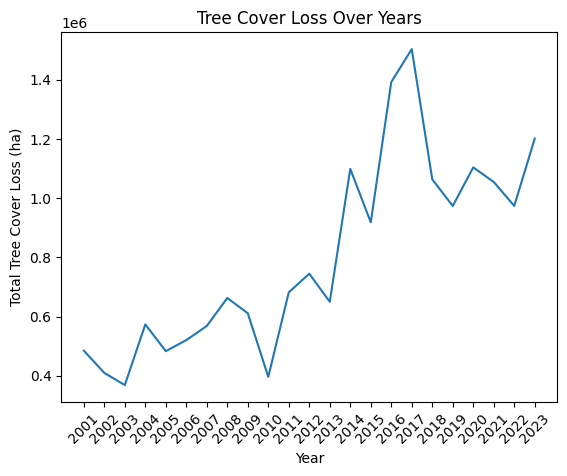

In [46]:
import matplotlib.pyplot as plt

# Extract tree cover loss data for visualization
years = [str(year) for year in range(2001, 2024)]
loss_values = [features_df[f'tc_loss_ha_{year}'].sum() for year in years]

plt.plot(years, loss_values)
plt.xlabel('Year')
plt.ylabel('Total Tree Cover Loss (ha)')
plt.title('Tree Cover Loss Over Years')
plt.xticks(rotation=45)
plt.show()


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"Training RMSE: {train_rmse}, MAE: {train_mae}")
print(f"Testing RMSE: {test_rmse}, MAE: {test_mae}")


Training RMSE: 8.765283265933327, MAE: 0.6851220084467382
Testing RMSE: 8.029447549798913, MAE: 1.1978048780487793


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(future_input)
print(f"Predicted tree cover loss for 2024 using Random Forest: {rf_pred[0]}")


Predicted tree cover loss for 2024 using Random Forest: 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [49]:
import pandas as pd

# Dummy data for demonstration; replace with your actual data
data = {
    'region': ['Andaman and Nicobar', 'Nicobar Islands', 'Maharashtra', 'Karnataka', 'Delhi'],
    'predicted_loss_2024': [54, 46, 30, 20, 15],  # Replace with your actual predicted values
    'latitude': [6.6111, 6.0187, 19.7515, 15.3173, 28.6139],
    'longitude': [92.1864, 93.8468, 75.7139, 75.7139, 77.2090],
}

predictions_df = pd.DataFrame(data)
print(predictions_df)


                region  predicted_loss_2024  latitude  longitude
0  Andaman and Nicobar                   54    6.6111    92.1864
1      Nicobar Islands                   46    6.0187    93.8468
2          Maharashtra                   30   19.7515    75.7139
3            Karnataka                   20   15.3173    75.7139
4                Delhi                   15   28.6139    77.2090


In [50]:
import folium
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)  # Centered over India

# Prepare data for heatmap
heat_data = [[row['latitude'], row['longitude'], row['predicted_loss_2024']] for index, row in predictions_df.iterrows()]

# Create a heatmap
HeatMap(heat_data, radius=30).add_to(m)

# Save to an HTML file to view in browser
m.save('tree_cover_loss_heatmap.html')
m


In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data_path = 'data/subnationalforestcover.csv'  # Change this to the path of your dataset
df = pd.read_csv(data_path)

# Step 2: Data Preprocessing
# Create a features DataFrame
features_df = df.copy()

# Create target loss column (use the last known value for prediction)
features_df['target_loss'] = features_df['tc_loss_ha_2023']

# Select relevant columns for features and target
feature_columns = [f'tc_loss_ha_{year}' for year in range(2001, 2023)]
X = features_df[feature_columns]
y = features_df['target_loss']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions for 2024 and 2025
# Prepare input for prediction using the last known values
last_known_values = features_df.iloc[-1][feature_columns].values.reshape(1, -1)

# Predict for 2024
predicted_loss_2024 = model.predict(last_known_values)[0]

# Update the last known values for predicting 2025
last_known_values[0, -1] = predicted_loss_2024  # Update the last value with the prediction for 2024

# Predict for 2025
predicted_loss_2025 = model.predict(last_known_values)[0]

# Print the predictions
print(f"Predicted tree cover loss for 2024: {predicted_loss_2024}")
print(f"Predicted tree cover loss for 2025: {predicted_loss_2025}")

# Step 6: Visualize Predictions
# Assuming features_df is constructed as shown earlier
print("Shape of features_df:", features_df.shape)

# Extract only the last 23 years' loss data
historical_loss = features_df['target_loss'].iloc[-23:].values.tolist()
# Step 6: Visualize Predictions
# Extracting the historical loss values for years 2001 to 2023
historical_loss = features_df['target_loss'].values.tolist()  # This should contain 23 values for years 2001-2023

# Assuming predicted_loss_2024 and predicted_loss_2025 are correctly defined earlier
predictions = historical_loss + [predicted_loss_2024, predicted_loss_2025]  # Append future predictions

# Create a years list that includes years 2001 to 2023 and then 2024, 2025
years = list(range(2001, 2024)) + [2024, 2025]  # This will create a list of 25 years

# Ensure predictions is aligned with years
assert len(years) == len(predictions), f"Mismatch: {len(years)} years vs {len(predictions)} predictions"

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(years, predictions, marker='o', linestyle='-', color='b')
plt.title('Predicted Tree Cover Loss')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.xticks(years)  # Ensure all years are shown on the x-axis
plt.grid()
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()


Predicted tree cover loss for 2024: 0.35
Predicted tree cover loss for 2025: 0.35
Shape of features_df: (5328, 32)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


AssertionError: Mismatch: 25 years vs 5330 predictions